# Readings

In [10]:
from scipy.optimize import minimize
import numpy as np


def f(x):
    # Define the function to maximize
    return np.exp(-(x-2)**2)

def minus_f(x):
    # Negative of the function above so we can minimize this one
    return -f(x)

result = minimize(minus_f, 1)
print(result.x)

[1.99999999]


Started at 2.00; ended at 2.32; f(2.32) = -1.00
Started at 4.00; ended at 4.34; f(4.34) = -1.00
Started at 6.00; ended at 5.69; f(5.69) = -1.00
Started at 8.00; ended at 8.93; f(8.93) = -1.00


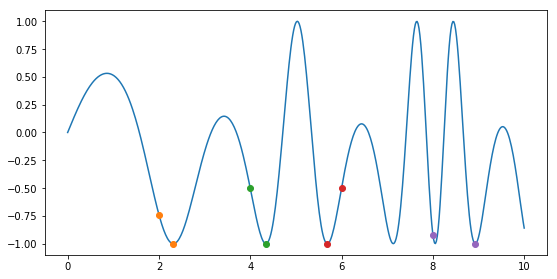

In [5]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return np.sin(x * np.cos(x))

plot_x = np.linspace(0, 10, 500)
plot_y = f(plot_x)
plt.figure(figsize=(9, 4.5))
plt.plot(plot_x, plot_y)

for x_initial in [2, 4, 6, 8]:
    result = minimize(f, x_initial)
    x_final = result.x
    plt.plot([x_initial, x_final], [f(x_initial), f(x_final)], 'o')
    print('Started at %.2f; ended at %.2f; f(%.2f) = %.2f' % 
         (x_initial, x_final, x_final, f(x_final)))

plt.show()

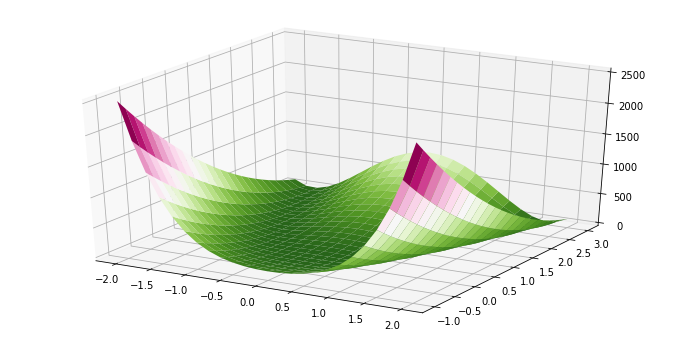

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm # Color maps
import numpy as np

# Set up figure and 3d axes
fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection='3d')

# Make the data to plot
x = np.linspace(-2, 2, 25)
y = np.linspace(-1, 3, 25)
X, Y = np.meshgrid(x, y)
Z = (1 - X)**2 + 100*(Y - X**2)**2

# Plot a surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.PiYG_r)
plt.show()

In [7]:
import numpy as np
from scipy.optimize import minimize

def f(x):
    return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2

x_initial = np.array([0, 0])
result = minimize(f, x_initial)
x_final = result.x
print('Started at', x_initial)
print('Ended at', x_final)
print('f(%s) = %.6f' % (x_final, f(x_final)))

Started at [0 0]
Ended at [0.99999467 0.99998932]
f([0.99999467 0.99998932]) = 0.000000


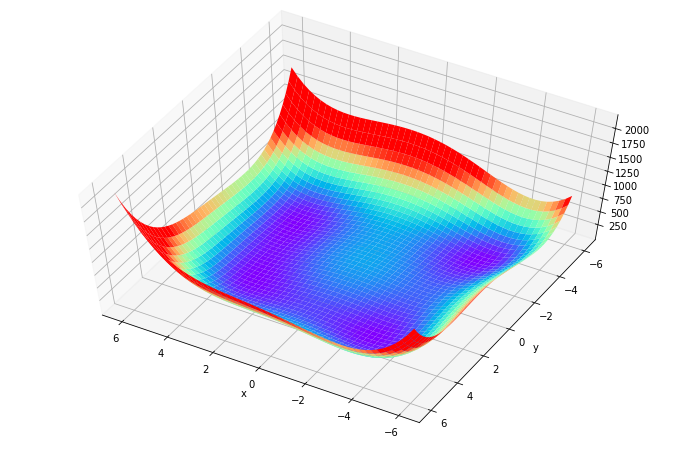

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm # Color maps
import numpy as np

# Set up figure and 3d axes
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')

# Make the data to plot
x = np.linspace(-6, 6, 50)
y = np.linspace(-6, 6, 50)
X, Y = np.meshgrid(x, y)
Z = (X**2 + Y - 11)**2 + (X + Y**2 - 7)**2

# Plot a surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.rainbow, vmin=0, vmax=800)
plt.xlabel('x')
plt.ylabel('y')
ax.view_init(60, 120) # Rotate 3d axes for a better view
plt.show()

In [9]:
import numpy as np
from scipy.optimize import minimize
def f(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

for x_initial in [np.array([-4, -4]), 
                  np.array([2, -2]), 
                  np.array([2, 2]), 
                  np.array([-4, 4])]:
    result = minimize(f, x_initial)
    x_final = result.x
    print('Started at', x_initial)
    print('Ended at', x_final)
    print('f(%s) = %.6f' % (x_final, f(x_final)))
    print()

Started at [-4 -4]
Ended at [-3.77931027 -3.283186  ]
f([-3.77931027 -3.283186  ]) = 0.000000

Started at [ 2 -2]
Ended at [ 3.58442833 -1.84812655]
f([ 3.58442833 -1.84812655]) = 0.000000

Started at [2 2]
Ended at [3.00000003 2.00000002]
f([3.00000003 2.00000002]) = 0.000000

Started at [-4  4]
Ended at [-2.80511803  3.13131251]
f([-2.80511803  3.13131251]) = 0.000000



# Pre-Class Work

In [11]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

In [12]:
# Code from session 3.1

def norminvgamma_pdf(x, sigma2, mu, nu, alpha, beta):
    '''
    The probability density function of the normal-inverse-gamma distribution at
    x (mean) and sigma2 (variance).
    '''
    return (
        sts.norm.pdf(x, loc=mu, scale=np.sqrt(sigma2 / nu)) *
        sts.invgamma.pdf(sigma2, a=alpha, scale=beta))

def norminvgamma_rvs(mu, nu, alpha, beta, size=1):
    '''
    Generate n samples from the normal-inverse-gamma distribution. This function
    returns a (size x 2) matrix where each row contains a sample, (x, sigma2).
    '''
    # Sample sigma^2 from the inverse-gamma distribution
    sigma2 = sts.invgamma.rvs(a=alpha, scale=beta, size=size)
    # Sample x from the normal distribution
    x = sts.norm.rvs(loc=mu, scale=np.sqrt(sigma2 / nu), size=size)
    return np.vstack((x, sigma2)).transpose()

Given the information below, find reasonable values for the prior parameters of the normal-inverse-gamma distribution — μ₀, ν₀, α₀, β₀. You will be asked to provide your values for the prior hyperparameters in class, and to explain how you came up with them. Information provided:
- The data are normally distributed. The error margins given below represent 1 standard deviation from the mean of the parameter.
- Constraint: the mean of the data is approximately 2.3 ± 0.5.
- Constraint: the variance of the data is approximately 2.75 ± 1.
- Find μ₀, ν₀, α₀, β₀ hyperparameters for the normal-inverse-gamma prior that match this information.

You can solve this problem in at least two different ways. You have to implement at least
one of these two methods. Ideally, implement both and check that your answers match.

1. Frame the information above as an optimization problem. You should design a function that is minimized when the constraints above are all satisfied. You can do this by creating an objective function of the sum of squared residuals of the constraints. Use SciPy to find the minimum of the objective function. For example, the mean of the data mean should be 2.3. From Wikipedia , we know that the expected value of the mean of the normal-inverse-gamma distribution is μ0 so we add the term $(μ0 - 2.3)^2$ to the objective function. You should have 4 such terms in your function, corresponding to the 4 constraints in the information above.

In [32]:
# The objective function can be written as:
# Exp[x] = μ
# Exp[𝜎^2] = β / α-1
# alpha has to be greater than 1

# mu = x[0], beta = x[1], alpha = x[2], nu = x[3]

def f(x):
    return ((x[0] - 2.3)**2 +                               # mean of the data mean
            ((x[1] / (x[2]-1)) - 2.75)**2 +                 # mean of the data variance
            ((x[1] / ((x[2]-1) * x[3])) - 0.5)**2 +         # sd of the data mean 
            ((x[1]**2 / ((x[2]-2) * (x[2]-1)**2) - 1)**2))  # sd of the data variance 



result = minimize(f, [0, 0, 0, 0])
x_final = result.x
print('Started at', [0, 0, 0, 0])
print('Ended at', x_final)
print('\nf(%s) = %.6f' % (x_final, f(x_final)))

Started at [0, 0, 0, 0]
Ended at [0. 0. 0. 0.]

f([0. 0. 0. 0.]) = nan


C:\Users\Taha\Anaconda3\Anaconda4\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Taha\Anaconda3\Anaconda4\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


2. The constraints above give you the mean of the data mean, the standard deviation of the data mean, the mean of the data variance, and the standard deviation of the data variance. Solve these 4 equations (one for each of the quantities above) simultaneously to find the values of the prior parameters.

- We want to minimimze the following equations:

$Exp\left[x\right]=\left(\mu-2.3\right)^2$

$Exp\left[\sigma^2\right]=\frac{\beta}{\alpha-1}$

$Var\left[\sigma^2\right]=\frac{\beta^2}{\left(\alpha-1\right)^2\left(\alpha-2\right)}$

$Var\left[x\right]=\frac{\beta}{\left(\alpha-1\right){\lambda}}$